In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install fastai==1.0.61

In [ ]:
# import os
# from fastai import *
# from fastai.vision import *

In [3]:
!pip install -Uqq fastbook

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incompatible.


In [4]:
#from fastai.vision import *
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *


In [5]:
from fastai.vision import *
from fastai.vision.all import *

In [6]:
path = Path('../input/macular/Retina_Data')

In [7]:
data = ImageDataLoaders.from_folder(path, train='ME',valid='Test_ME',item_tfms=Resize(300), bs=64, num_workers=16)

In [8]:
learn = cnn_learner(data, models.densenet121, metrics = [error_rate,accuracy])
learn.fit_one_cycle(5)
#learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.436390,1.039003,0.446602,0.553398,01:45
1,1.079423,1.437949,0.582524,0.417476,01:46
2,0.856431,1.270067,0.485437,0.514563,01:46
3,0.690120,0.931805,0.339806,0.660194,01:47
4,0.591576,0.888911,0.310680,0.689320,01:45


In [10]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.189681,0.889769,0.203883,0.796117,01:46
1,0.155216,1.048643,0.281553,0.718447,01:44
2,0.143499,0.951826,0.242718,0.757282,01:42


In [11]:
learn.model_dir = "/kaggle/working/"

In [12]:
learn.save('s1')

Path('/kaggle/working/s1.pth')

In [13]:
mdl = learn.load('s1')

SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=6.309573450380412e-07)

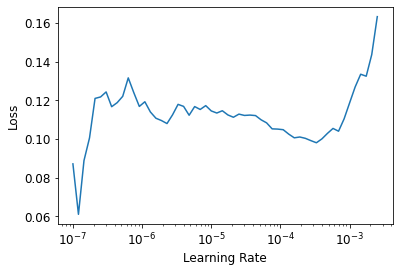

In [14]:
mdl.unfreeze()
mdl.lr_find()

In [15]:
# validation accuracy of the initial model
preds, y, loss = mdl.get_preds(with_loss=True)
acc = accuracy(preds, y)

print('The accuracy is {0} %.'.format(acc*100))

The accuracy is 75.72815704345703 %.


ROC area is 0.7688172043010753


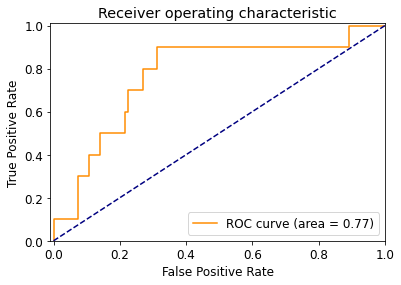

In [16]:
# This Validation-ROC is for the intial model
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [17]:
# Fine tune over 3 epochs using lr.find()
mdl.fit_one_cycle(5, lr_max = slice(1e-3, 1e-25))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.132133,1.560990,0.466019,0.533981,01:45
1,0.274758,2.971214,0.475728,0.524272,01:44
2,0.316112,1.771304,0.388350,0.611650,01:44
3,0.325764,1.249146,0.271845,0.728155,01:44
4,0.313588,0.979947,0.223301,0.776699,01:45


In [18]:
mdl.fit_one_cycle(5, lr_max = slice(1e-3, 1e-25))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.301408,1.252940,0.223301,0.776699,01:45
1,0.365011,1.474672,0.320388,0.679612,01:45
2,0.396341,1.104738,0.242718,0.757282,01:44
3,0.366172,1.047249,0.213592,0.786408,01:44
4,0.333822,0.986776,0.194175,0.805825,01:42


In [19]:

# Save the model
mdl.save('s2')


Path('/kaggle/working/s2.pth')

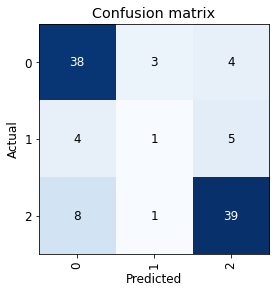

In [20]:
model = learn.load('s1')
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=7.585775847473997e-07)

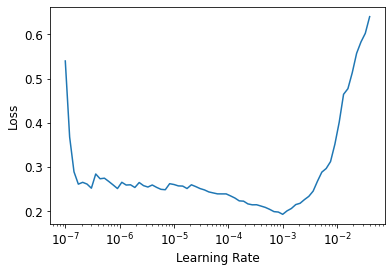

In [22]:
mdl.unfreeze()
mdl.lr_find()

In [23]:
mdl.fit_one_cycle(5, lr_max = slice(1e-3, 1e-25))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.252873,1.091815,0.203883,0.796117,01:45
1,0.273023,1.538858,0.310680,0.689320,01:44
2,0.339654,1.343589,0.271845,0.728155,01:44
3,0.364527,0.894245,0.203883,0.796117,01:45
4,0.355869,0.927492,0.203883,0.796117,01:45


In [24]:
mdl.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.341638,1.053557,0.233010,0.766990,01:43


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.361630,0.997817,0.203883,0.796117,01:46


In [25]:
mdl.save('s3')

Path('/kaggle/working/s3.pth')

In [27]:
preds, y, loss = mdl.get_preds(with_loss=True)
acc = accuracy(preds, y)

print('The accuracy is {0} %.'.format(acc*100))

The accuracy is 79.61165618896484 %.


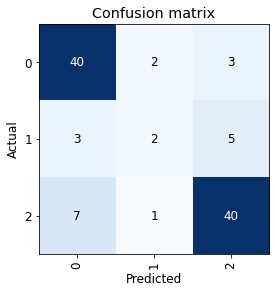

In [26]:
mmodel = mdl.load('s3')
interp = ClassificationInterpretation.from_learner(mmodel)
interp.plot_confusion_matrix()

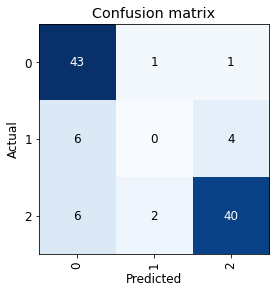

In [21]:
mmodel = mdl.load('s2')
interp = ClassificationInterpretation.from_learner(mmodel)
interp.plot_confusion_matrix()

In [27]:

mdl.export('/kaggle/working/me.pkl')

The accuracy is 87.40157318115234 %.
ROC area is 0.9119922630560928


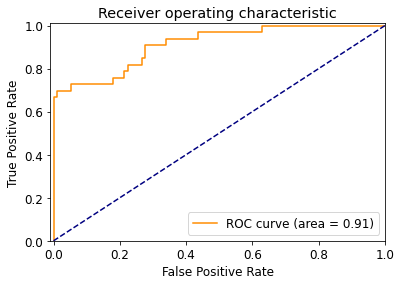

In [28]:
preds, y, loss = mmodel.get_preds(with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc*100))
from sklearn.metrics import roc_curve, auc

# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

IndexError: list index out of range

In [ ]:
test_files

In [ ]:

pred_probas, _, pred_classes = mmodel.get_preds(dl=test_dl, with_decoded=True)

In [ ]:
# Converted to numpy array
import numpy as np
preds = np.round(pred_probas,0)
preds = preds.numpy()
pred_classes = pred_classes.numpy()

In [ ]:

print(type(pred_probas),type(pred_classes))

In [ ]:
# test ROC for the fine tuned model

from sklearn.metrics import roc_curve, auc

# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(pred_classes, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")